In [1]:
import numpy as np
from scifit.solvers import linear, scientific, specials
from scifit.interfaces import generic

In [2]:
class Taylor(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b, c):
        return a * np.power(x[:, 0], 2)  + b * np.power(x[:, 0], 1) + c * np.power(x[:, 0], 0) 

class Exp(generic.FitSolverInterface):
    @staticmethod
    def model(x, a, b, c):
        return a * np.exp(b * x[:, 0]) + c

In [3]:
models = [Exp(), Taylor()]

In [4]:
data = models[0].synthetic_dataset(sigma=0.015, xmin=2., xmax=2.5, resolution=30, parameters=[2.0, 1.0, 3.0], scale_mode="auto")

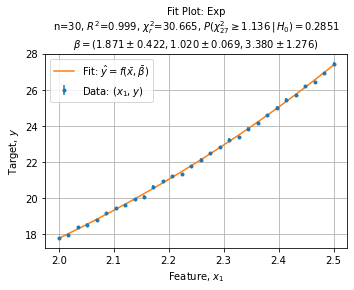

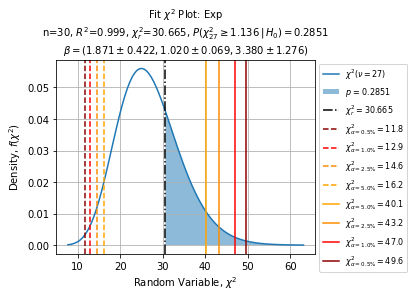

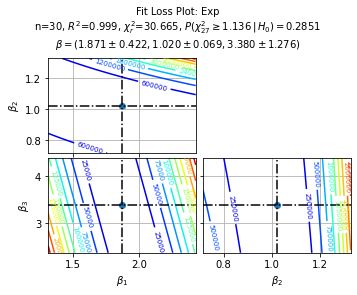

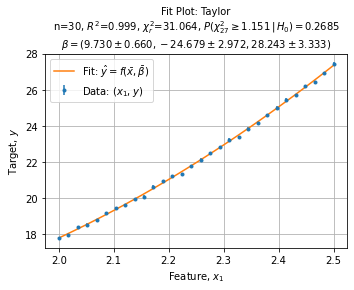

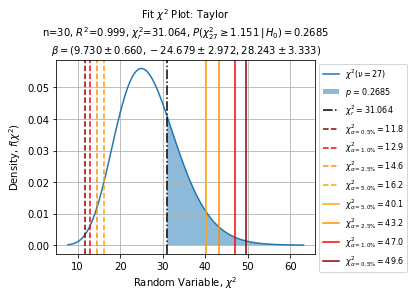

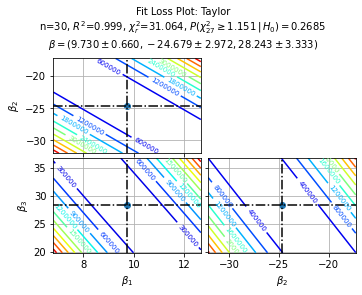

In [5]:
for model in models:
    _ = model.load(data)
    sol = model.fit()
    axe = model.plot_fit(title=model.__class__.__name__)
    axe = model.plot_chi_square(title=model.__class__.__name__)
    axe = model.plot_loss(title=model.__class__.__name__)

In [6]:
import matplotlib.pyplot as plt

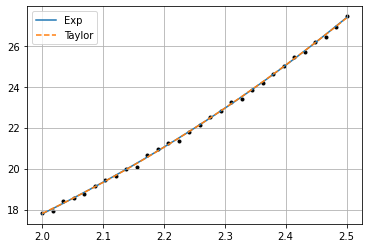

In [9]:
fig, axe = plt.subplots()
xlin = np.linspace(data["x0"].min(), data["x0"].max(), 200).reshape(-1, 1)
axe.scatter(data["x0"], data["y"], marker=".", color="black")
styles = ["-", "--"]
for model, style in zip(models, styles):
    axe.plot(xlin, model.predict(xlin), linestyle=style, label=model.__class__.__name__)
axe.legend()
axe.grid()